### Project Overview
>From a high level vantage, this is an image classification project.  
>With image classification, the input is an image and the output is a class.  
>Here, the problem domain is narrowed to the domain of dogs.  
>Specifically the intent is to input an image of a dog and output the dog breed.  
>This is a popular project of Udacity's, featured in many nanodegree programs.  
>The data set is curated by Udacity upon their project workspace.  
>This data set consists of over 8000 dog images from 133 breeds.  
>Additional input data includes uploaded image file aquired from a camera phone.

### Problem Statement
>Given a picture, identify if it contains a dog, and if so - reveal it's likely breed;  
>in the case no dog was found, search to see if it contains a human face and if so,  
>reveal a dog breed of similarity to the face; otherwise reveal that neither a dog  
>nor a face was found.  Here an algorithm is developed to address this aim.
>
>A typical strategy to building classifiers is to use supervised learning.  
>Here, a data set of images with known class names is used to build a classification model.  
>The known data is split into train, validation, and test portions which are used to  
>optimize the performance of the classifier by tuning weight parameters in the model.  
>Various models are attempted, from simple to complex until a satisfactory result is found.  
>In this project a simple convolutional neural network is attempted, followed by the approach  
>of adopting pre-trained models tailored to classify dog breeds well.  As the complexity  
>of the models increases, the performance improves, culminating in amazing results.  

### Model Metrics
>In this work the main metric used is accuracy.  
>That is, when test data is run through a model,  
>accuracy is the percentage of correct predictions  
>out of all predictions.  
>Accuracy figures are typically given in percentage.  
>Attempts are made to optimize accuracy, within reason.  
>For Classifiers, Precision and Recall are also used.  
>These give a sense of false negatives and positives.  
>However in the context of Dogs this isn't critical.  
>An accurate Dog breed assessment is done by DNA testing.

# Data Scientist Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 


This notebook walks you through one of the most popular Udacity projects across machine learning and artificial intellegence nanodegree programs.  The goal is to classify images of dogs according to their breed.  

If you are looking for a more guided capstone project related to deep learning and convolutional neural networks, this might be just it.  Notice that even if you follow the notebook to creating your classifier, you must still create a blog post or deploy an application to fulfill the requirements of the capstone project.

Also notice, you may be able to use only parts of this notebook (for example certain coding portions or the data) without completing all parts and still meet all requirements of the capstone project.

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import pandas as pd
from glob import glob
import os
import PIL
from PIL import Image
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib import image as mplim
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sb
sb.set_style("darkgrid")

Using TensorFlow backend.


In [2]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    '''
    import a data path based upon udacity curated dataset
    load data files using sklearn utility
    return files and corresponding targets
    '''
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('../../../data/dog_images/train')
valid_files, valid_targets = load_dataset('../../../data/dog_images/valid')
test_files, test_targets = load_dataset('../../../data/dog_images/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("../../../data/dog_images/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [3]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("../../../data/lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


### Data Exloration and Visualization, Image Count by Breed

In [4]:
# Data Representation of Breed Counts
nnames = [s.split('.')[1] for s in dog_names]
train_breeds = np.asarray([nnames[np.argmax(train_targets[i])] for i in range(len(train_targets))])
valid_breeds = np.asarray([nnames[np.argmax(valid_targets[i])] for i in range(len(valid_targets))])
test_breeds = np.asarray([nnames[np.argmax(test_targets[i])] for i in range(len(test_targets))])
cnt_trn = []
cnt_val = []
cnt_tst = []
for name in nnames:
    cnt_trn.append(np.sum(train_breeds==name))
    cnt_val.append(np.sum(valid_breeds==name))
    cnt_tst.append(np.sum(test_breeds==name))
cnt_sum = [sum(x) for x in zip(cnt_trn, cnt_val, cnt_tst)]
df_breed = pd.DataFrame.from_dict({'name': nnames,
                                   'train': cnt_trn,
                                   'valid': cnt_val,
                                   'test': cnt_tst,
                                   'total': cnt_sum,
                                  })
df_breed = df_breed.sort_values(by='total', ascending=False)
df_breed = df_breed.drop(['total'], axis=1)
df_breed = df_breed.reset_index(drop=True)
df_breed.head()

name  train  valid  test
0  Alaskan_malamute     77      9    10
1     Border_collie     74      9    10
2      Basset_hound     73      9    10
3         Dalmatian     71      9     9
4      Bull_terrier     69      9     9

In [5]:
# Median Image Count Dog Breed
df_breed.iloc[66]['name']

'Anatolian_shepherd_dog'

In [6]:
# Breed Count Statistics
df_breed.describe()

train       valid        test
count  133.000000  133.000000  133.000000
mean    50.225564    6.278195    6.285714
std     11.863885    1.350384    1.712571
min     26.000000    4.000000    3.000000
25%     42.000000    6.000000    5.000000
50%     50.000000    6.000000    6.000000
75%     61.000000    7.000000    8.000000
max     77.000000    9.000000   10.000000

#### Image Count Reflection:  
>  The test and validation sets are roughly similar.  
>  The train set is roughly 8x the size of the others.  
>  The breed with the most images contains ~3x more  
>  than the breed with the least.

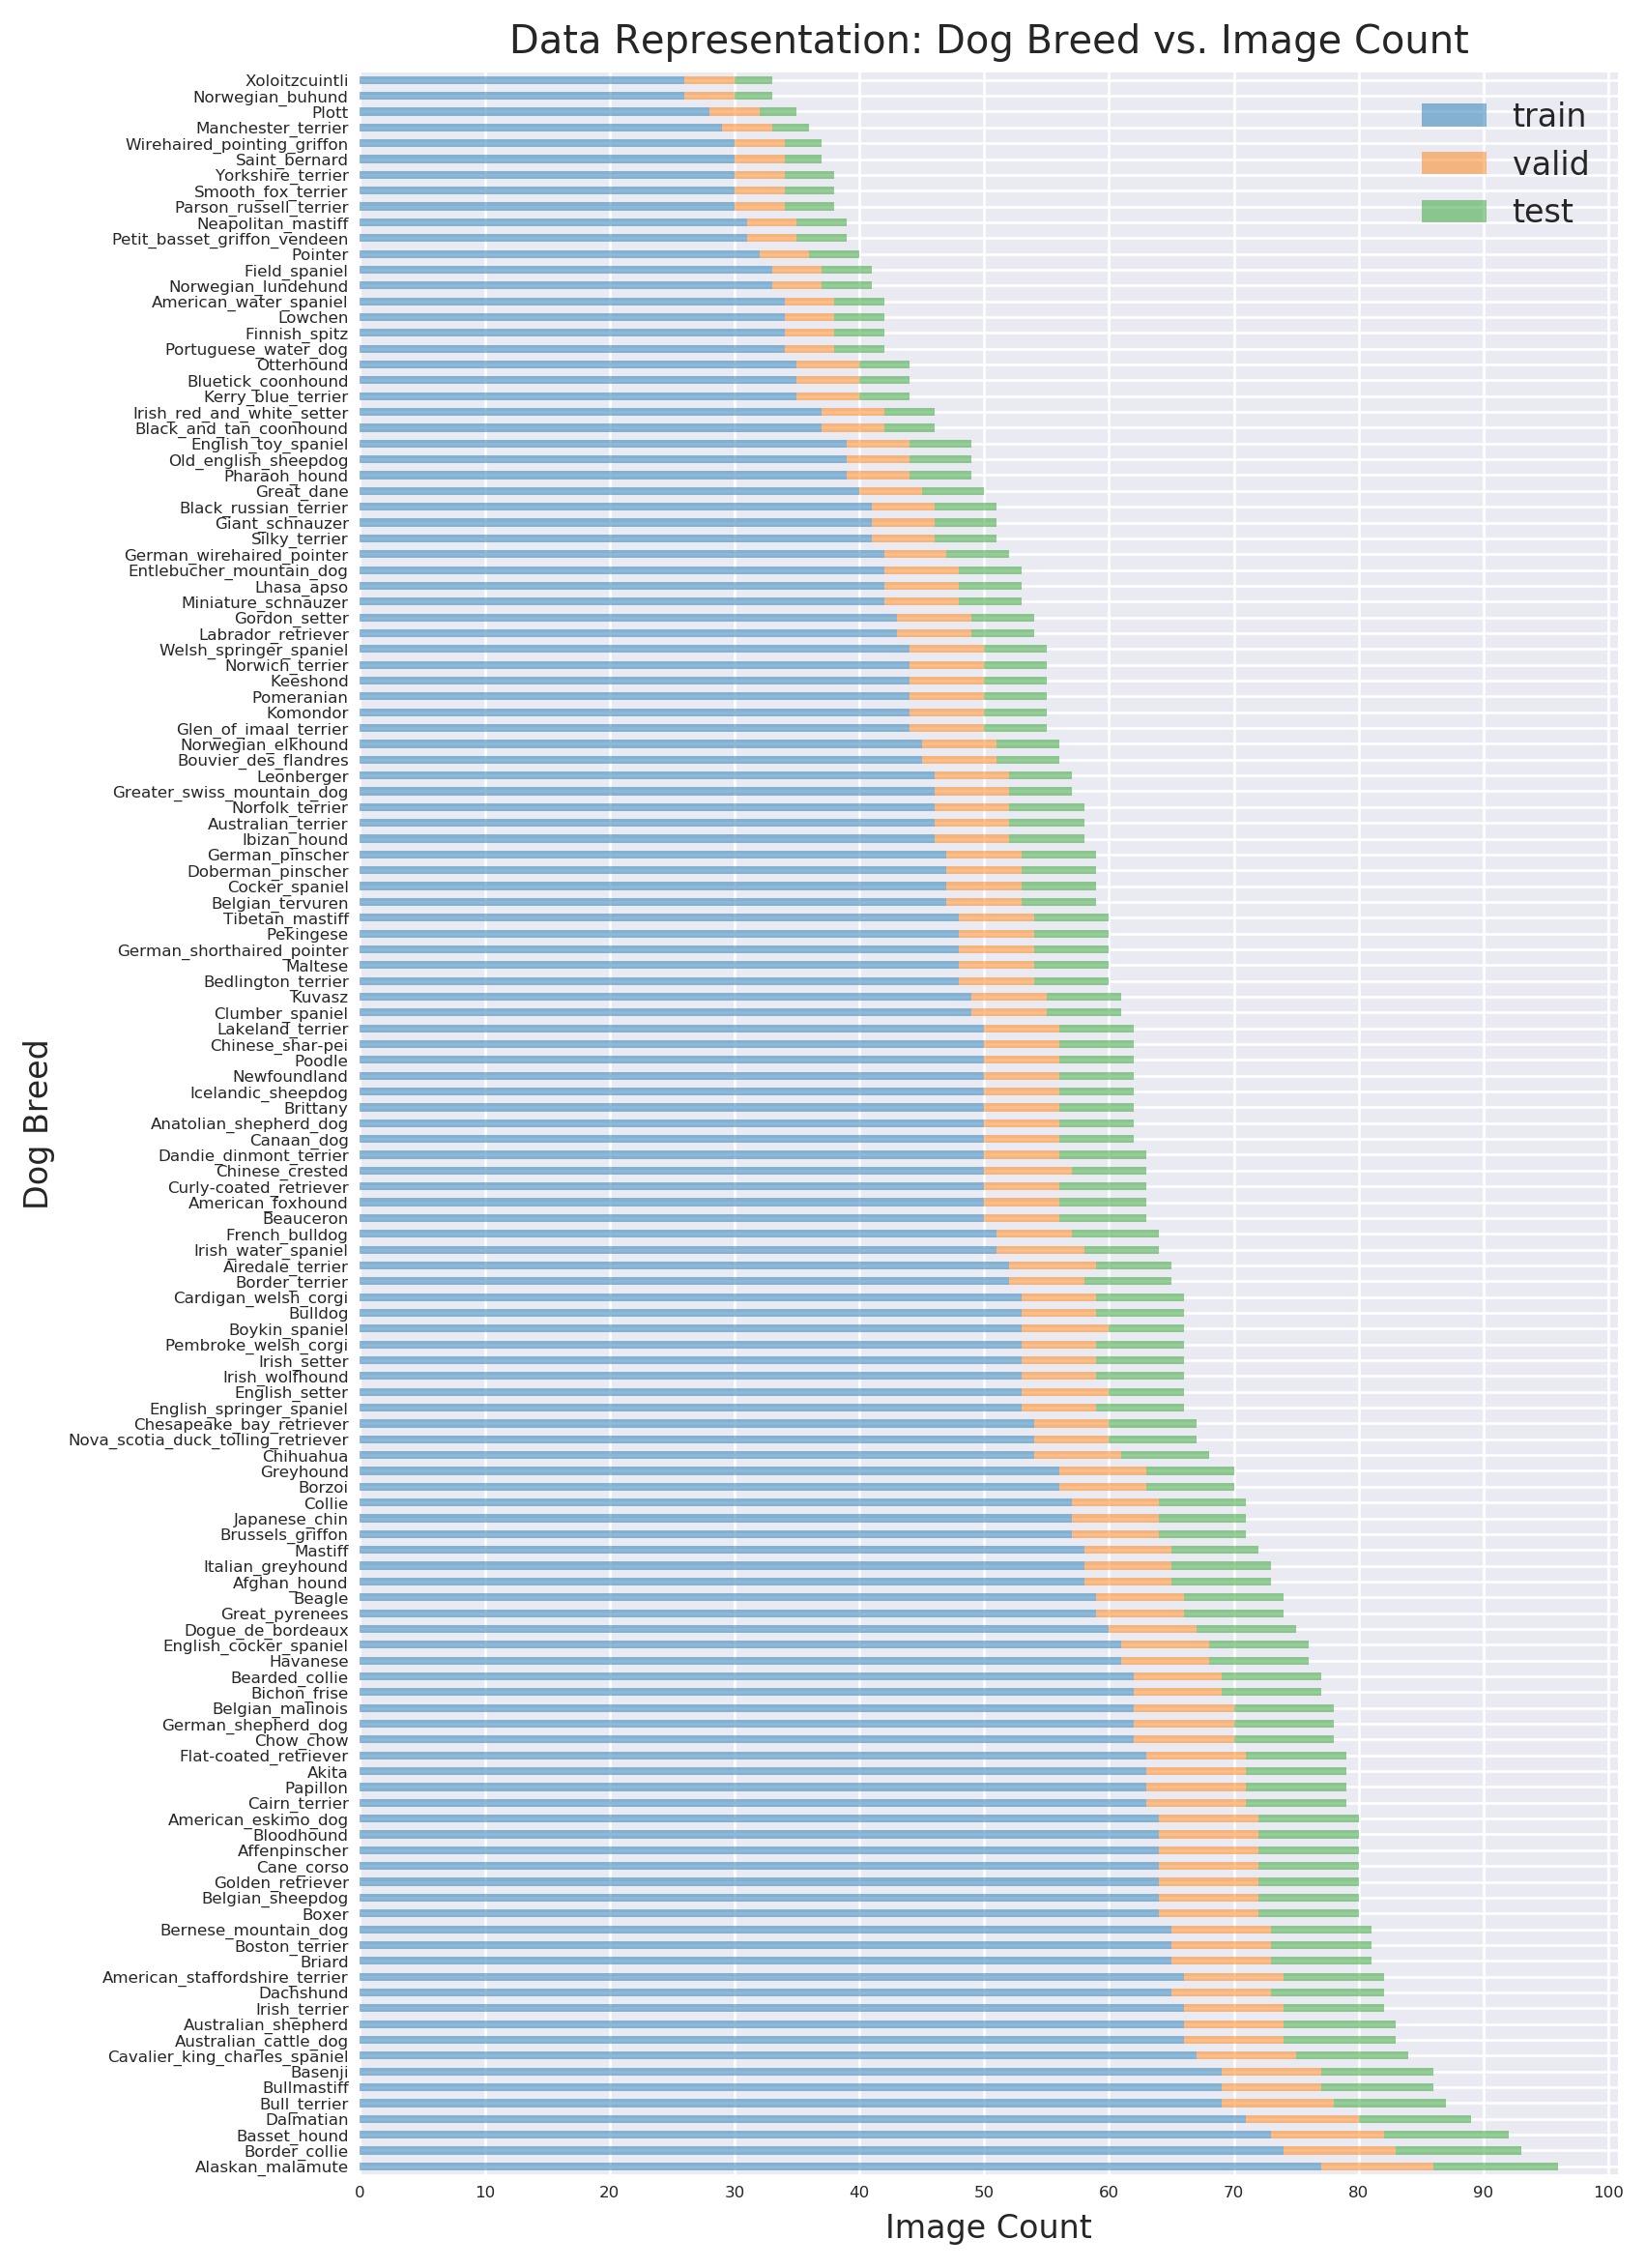

In [7]:
fig, ax1 = plt.subplots(1,1, figsize=(7, 12), dpi=120)
df_breed.plot.barh(x = 'name', stacked=True,
                   fontsize = 5, ax = ax1, 
                   alpha = 0.5)
ax1.set_xticks(ticks=list(range(0,110,10)), minor=False)
plt.title('Data Representation: Dog Breed vs. Image Count')
plt.xlabel('Image Count')
plt.ylabel('Dog Breed')
plt.show();

#### Visualization Reflection:  
>  The Alaskan Malamute has the most images at ~96 counted.  
>  The Xoloitzcuintli has fewest images at ~33 counted.   
>  The median Anatolian_shepherd_dog has ~63 images counted.

### Data Exloration and Visualization, Image File Size by Breed

In [8]:
# Data Representation of Image File Sizes
# Find median file sizes by breed and data set
train_size = np.asarray([os.stat(i).st_size for i in train_files])
valid_size = np.asarray([os.stat(i).st_size for i in valid_files])
test_size = np.asarray([os.stat(i).st_size for i in test_files])
byt_trn = []
byt_val = []
byt_tst = []
for name in nnames:
    #train
    trn_szs = np.where(train_breeds==name, train_size, 0)
    trn_szs_m = np.ma.masked_equal(trn_szs, 0)
    byt_trn.append(np.ma.median(trn_szs_m,axis=0))
    #validate
    val_szs = np.where(valid_breeds==name, valid_size, 0)
    val_szs_m = np.ma.masked_equal(val_szs, 0)
    byt_val.append(np.ma.median(val_szs_m,axis=0))
    #test
    tst_szs = np.where(test_breeds==name, test_size, 0)
    tst_szs_m = np.ma.masked_equal(tst_szs, 0)
    byt_tst.append(np.ma.median(tst_szs_m,axis=0))
byt_sum = [sum(x) for x in zip(byt_trn, byt_val, byt_tst)]
df_bytes = pd.DataFrame.from_dict({'name': nnames,
                                   'train': byt_trn,
                                   'valid': byt_val,
                                   'test':  byt_tst,
                                   'total': byt_sum,
                                  })
df_bytes = df_bytes.sort_values(by='total', ascending=False)
df_bytes = df_bytes.drop(['total'], axis=1)
df_bytes = df_bytes.reset_index(drop=True)
df_bytes.head()    

name     train     valid      test
0  Yorkshire_terrier  121949.0  188807.5  215495.0
1   Belgian_tervuren   36462.0  163635.0  324972.5
2          Greyhound  178811.0  165991.0  169492.0
3         Otterhound  154335.0  152180.0  190213.5
4            Lowchen  134256.5  120151.5  225110.0

In [9]:
# Median Image Size Dog Breed
df_bytes.iloc[66]['name']

'French_bulldog'

In [10]:
# Median Image File Byte Size Statistics
df_bytes.describe()

train          valid           test
count     133.000000     133.000000     133.000000
mean    85713.263158   89355.187970   93535.424812
std     36196.749375   46868.424722   52310.677599
min     34000.000000   20500.500000   25411.000000
25%     51064.000000   50274.500000   51889.000000
50%     84187.000000   80854.000000   81969.000000
75%    113310.000000  129604.500000  123517.000000
max    184305.000000  195115.000000  324972.500000

#### Image size Reflection:  
>  The median of the medians seems similar at  ~82 kb.  
>  The smalest image is 20 kb, the largest 325 kb.  
>  The total median bytes varies from 110 kb to 526 kb.  
>  Equalizing data disparity perfectly seems unlikely.  
>  Fundamentally, the data set is imbalanced.  
>  We expect some breeds to test better than others.

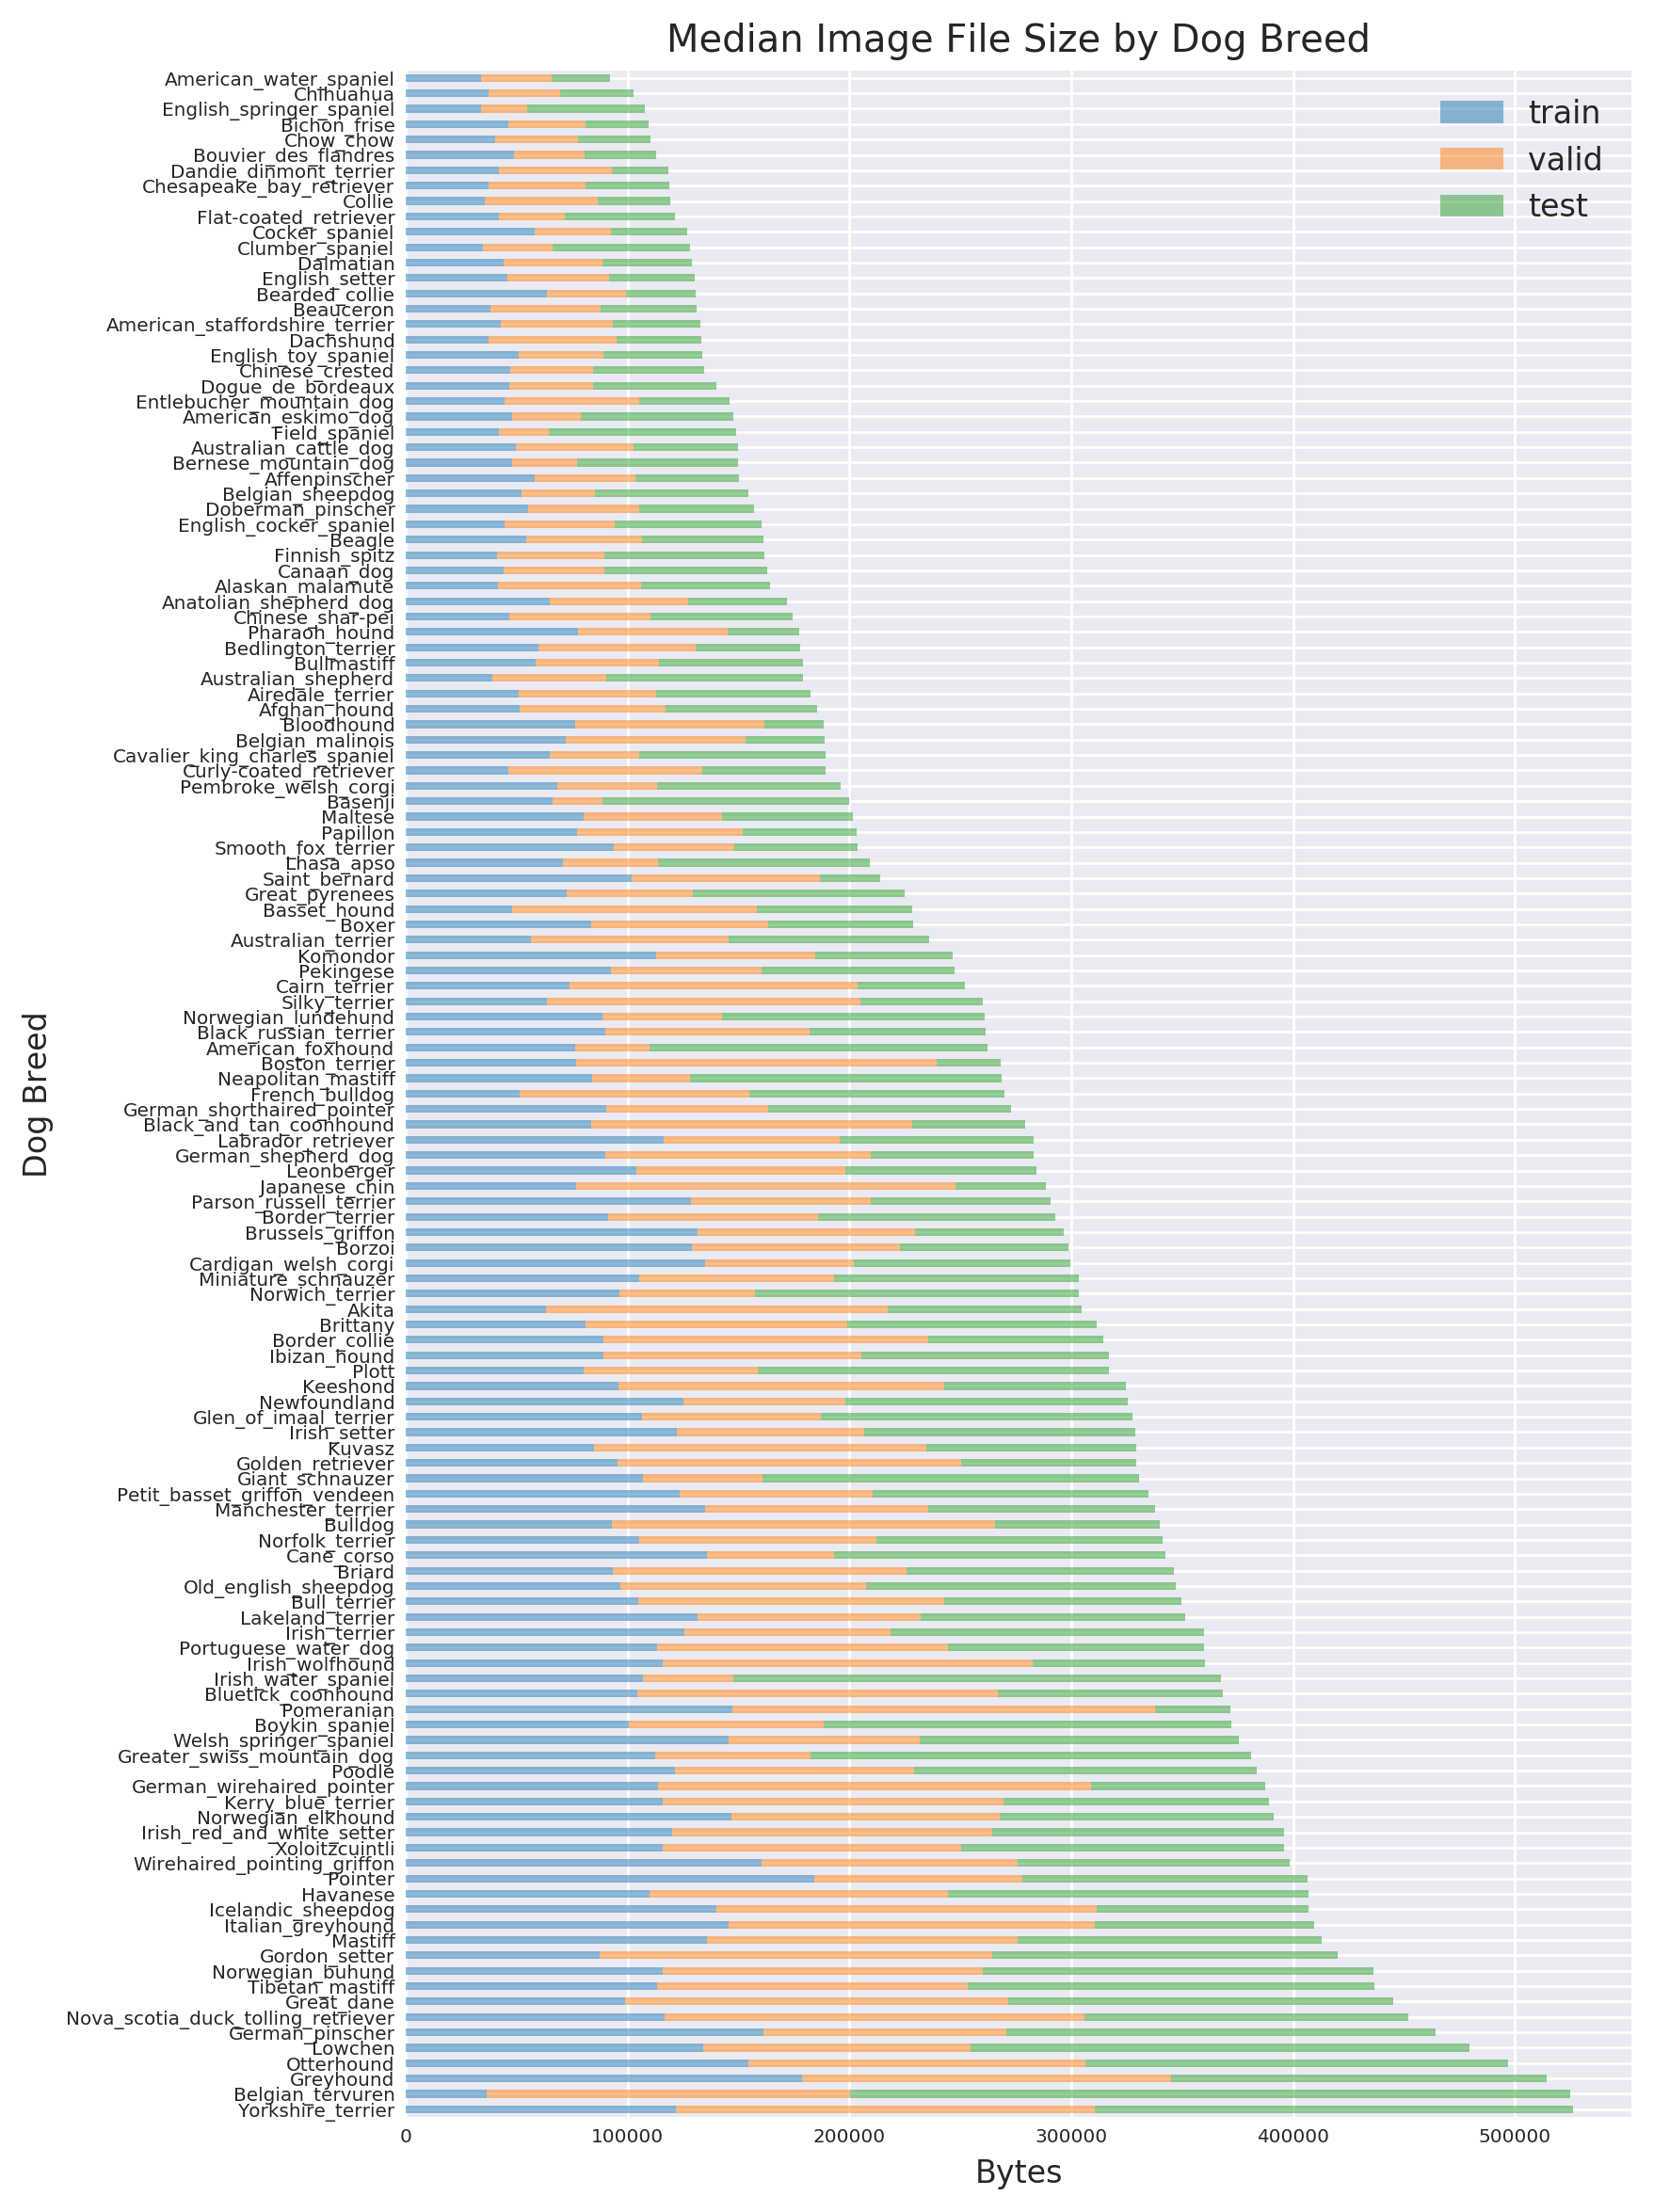

In [11]:
fig, ax1 = plt.subplots(1,1, figsize=(7, 12), dpi=120)
df_bytes.plot.barh(x = 'name', stacked=True,
                   fontsize = 6, ax = ax1, 
                   alpha = 0.5)
plt.title('Median Image File Size by Dog Breed')
plt.ylabel('Dog Breed')
plt.xlabel('Bytes')
plt.show();

#### Visualization Reflection:  
>  The images for the Yorshire Terrier tend to be the largest.  
>  The images for the American Water Spaniel seem to be the smallest.  
>  The French Bulldog sits in the middle of the pack at ~270 kb   
>  sum total for train validate and test median image sizes.  
>  We expect the image preprocessing to even this out to some extent.  
>  The shape of the preprocessing image tensors is (224,224,3).  
>  As a large jpeg image file of many pixels is converted to a tensor,   
>  we expect to lose information in a way that balances the data.  

### Data Exloration and Visualization, Image File Shape

In [12]:
# build a shape dataframe
def findshape(files,breeds,dset):
    '''
    import image files, breeds, dataset nickname
    load image and parse shape into categories
    return dataframe
    '''
    names = []
    heights = []
    widths = []
    aspects = []
    dsets = []
    for f,b in zip(files, breeds):
        try:
            fdata = mplim.imread(f)
            h,w,d = fdata.shape
            names.append(b)
            heights.append(h)
            widths.append(w)
            aspects.append(round(h/w,2))
            dsets.append(dset)
        except:
            print('Error loading: ' + f)
    df_shape = pd.DataFrame.from_dict({'name': names,
                                       'height': heights,
                                       'width': widths,
                                       'aspect': aspects,
                                       'dataset': dsets,
                                      })
    return df_shape

dfs_train = findshape(train_files, train_breeds,'train')
dfs_valid = findshape(valid_files, valid_breeds,'valid')
dfx_test = findshape(test_files, test_breeds,'test')
df_shape = pd.concat([dfs_train,dfs_valid,dfx_test], ignore_index=True)
df_shape.info()

Error loading: ../../../data/dog_images/train/098.Leonberger/Leonberger_06571.jpg
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8350 entries, 0 to 8349
Data columns (total 5 columns):
name       8350 non-null object
height     8350 non-null int64
width      8350 non-null int64
aspect     8350 non-null float64
dataset    8350 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 326.2+ KB


In [13]:
# Show Statistics on Shape
df_shape.describe()

height        width       aspect
count  8350.000000  8350.000000  8350.000000
mean    529.016287   566.977844     0.990522
std     333.207284   388.997792     0.301933
min     113.000000   105.000000     0.350000
25%     360.000000   375.000000     0.750000
50%     467.000000   500.000000     0.890000
75%     600.000000   640.000000     1.270000
max    4003.000000  4278.000000     2.520000

#### Image shape Reflection:  
>  The average Height to Width Aspect ratio is 1.  
>  That is, the average image is square shape.  
>  The tallest image has a height ~2.5 times its width.  
>  The widest image has a height ~0.3 times its width.  
>  The median aspect ratio is less than one.  
>  This suggests images tend to be more landscape format,  
>  than portrait format.  
>  However, there could be situations of square images nested  
>  inside rectangular format files, where outlier pixels  
>  are not contributing information of interest.

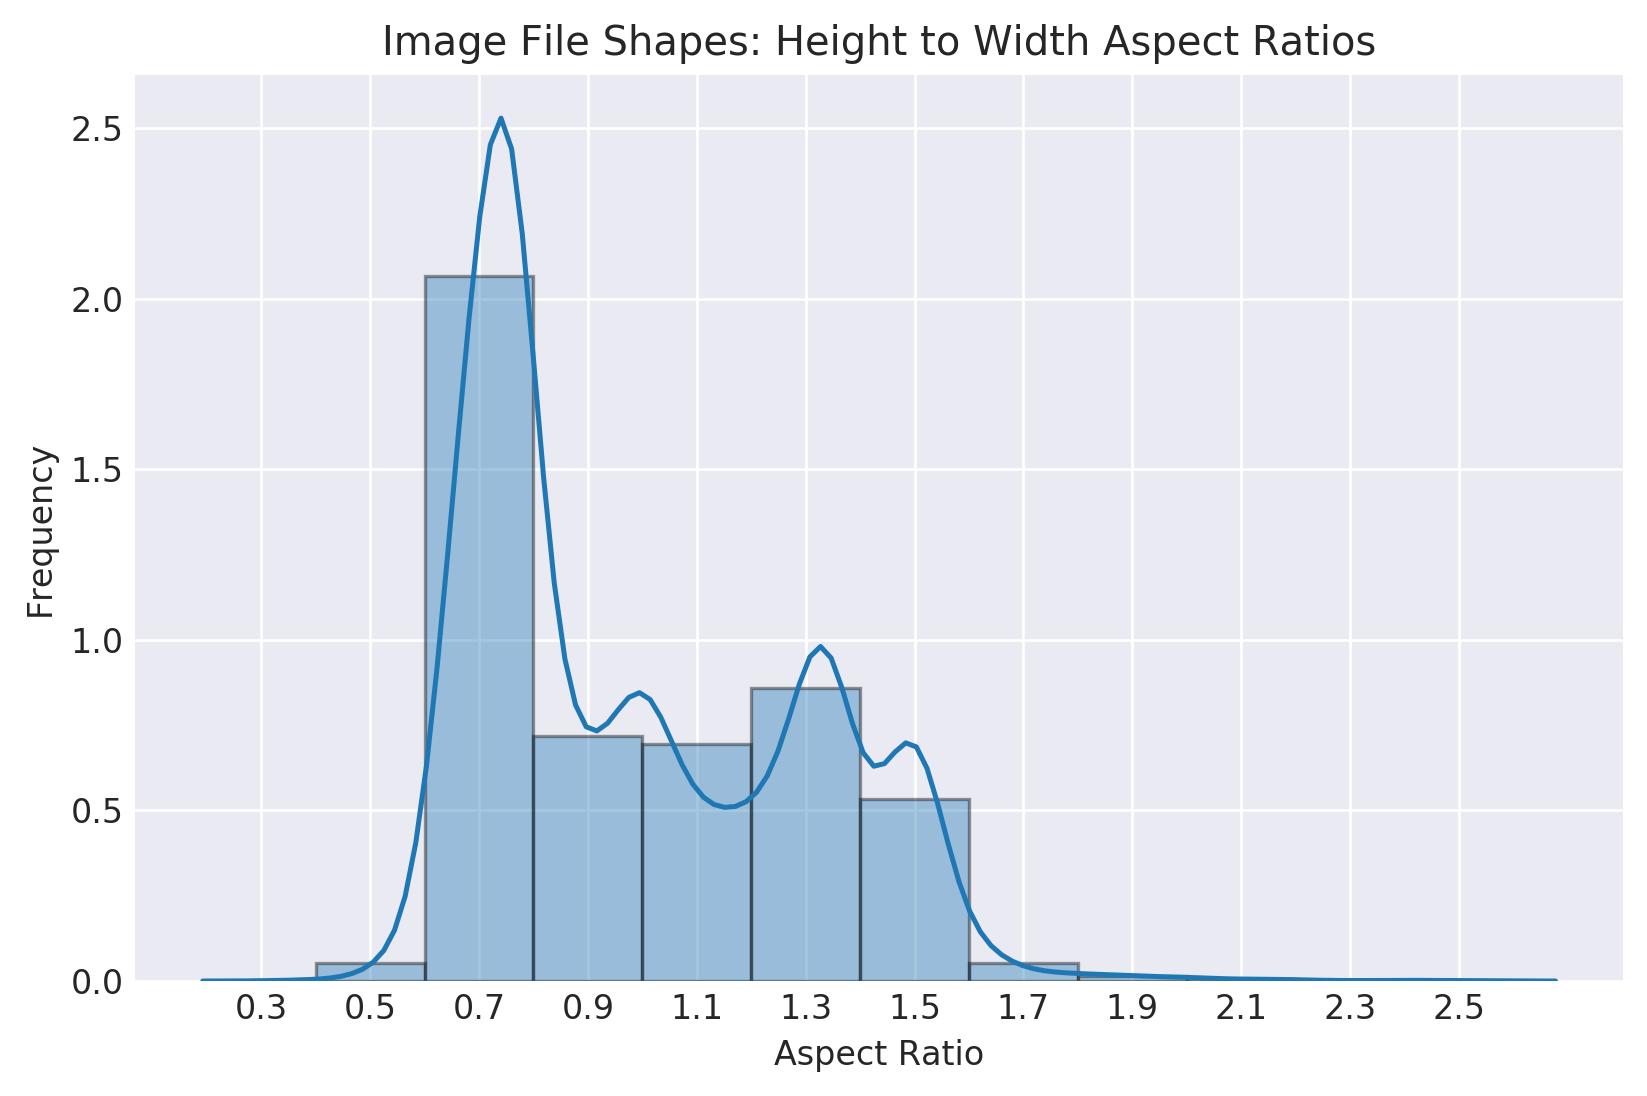

In [14]:
# Plot Aspect Ratio
fig, ax = plt.subplots(1,1, figsize=(8, 5), dpi=120)
bins = np.arange(0.2,2.8, 0.2)
ax = sb.distplot(df_shape.aspect, bins=bins, hist_kws= dict(edgecolor="k"))
ax.set(xlabel='Aspect Ratio', ylabel='Frequency')
ax.set_xticks(bins[:-1]+0.1)
ax.set_title('Image File Shapes: Height to Width Aspect Ratios')
plt.show()

#### Visualization Reflection:  
>  There is a right skew typical when the median or mode is less than the mean.    
>  As the image tensor is square, some pixel data may be cropped or distorted.   
>  A preprocessing step of scaling images on image load relates to this.

---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


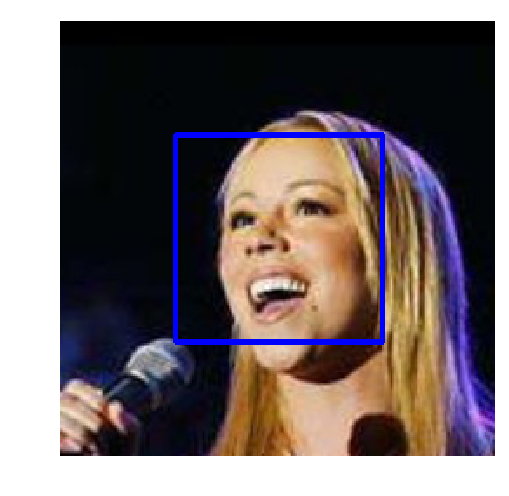

In [15]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[11])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.axis('off')
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [16]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    '''
    import the image path
    convert path to image object
    convert image to grayscale
    classify the image as containing a face or not
    return boolean result of classification
    '''
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__   
>1. The percentage of human faces found in the first 100 human pictures is 100.  
>2. The percentage of human faces found in the first 100 dog pictures is 11.

In [17]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
percent_hfhp = np.sum(list(map(face_detector,human_files_short)))
percent_hfdp = np.sum(list(map(face_detector,dog_files_short)))
print('percent human faces found in human pics = ', percent_hfhp )
print('percent human faces found in dog pics = ', percent_hfdp )

percent human faces found in human pics =  100
percent human faces found in dog pics =  11


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__   
>This seems a reasonable expectation given that the model is trained consistent to this expectation.  
>For example, a human wears clothes.  It is conceivable that some clothes appear dog like in nature.  
>However, a human face is used here as a differentiating factor that distinguishes a human presence.

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

In [18]:
## (Optional) TODO: Report the performance of another  
## face detection algorithm on the LFW dataset
def face_detector2(img_path):
    '''
    input image path
    convert path to image object
    convert object to grayscale
    classify based upon refined hyperparameters
    return boolean result as containing face or not
    '''
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.15,
        minNeighbors=5,
        minSize=(30, 30),
    )
    return len(faces) > 0

percent_hfhp2 = np.sum(list(map(face_detector2,human_files_short)))
percent_hfdp2 = np.sum(list(map(face_detector2,dog_files_short)))
print('Upgraded Human Face Detection Attempt')
print('percent human faces found in human pics = ', percent_hfhp2 )
print('percent human faces found in dog pics = ', percent_hfdp2 )

Upgraded Human Face Detection Attempt
percent human faces found in human pics =  99
percent human faces found in dog pics =  2


#### Evolved Detector Reflection:  
>  The scale factor hyer parameter was changed from 1.1 to 1.5,  
>  this has the effect of scaling the image more to find features.  
>  This degraded the human face performance but improved   
>  the dog pic performance significantly.  
>  The end algo has a hierarchical sequence of looking for dogs,  
>  then if it doesn't find a dog, to look for a human.  
>  In the case it misses a dog, we don't want it to make  
>  a second mistake of finding a human in a dog picture.  

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [19]:
from keras.applications.resnet50 import ResNet50
# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 1s 0us/step


### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [20]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    '''
    input image path
    load image
    render into compatible tensor
    return tensor
    '''
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224),
                         interpolation = "bicubic")
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    '''
    input list of image paths
    render paths to tensors
    return vertical stack of tensors
    '''
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

####  Preprocessing Reflection  
>  We saw earlier most images are not square.  
>  The default image load scaling format is nearest.  
>  Potentially, improvement in retaining image fidelity   
>  may be attained in using bilinear or bicubic scaling  
>  within the image load preprocessing step.
>  
>  References:  
>  https://keras.io/api/preprocessing/image/  
>  https://en.wikipedia.org/wiki/Comparison_gallery_of_image_scaling_algorithms


### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [21]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    '''
    input image path
    convert path to tensor
    preprocess the tensor
    make predictions
    return most probable prediction
    '''
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [22]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    '''
    input image path
    retrieve most probable prediction
    classify prediction as likely a dog
    return boolean result
    '''
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__   
>1. The percentage of dogs found in the first 100 human pictures is 0.  
>2. The percentage of dogs found in the first 100 dog pictures is 100.

In [23]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

percent_dfhp = np.sum(list(map(dog_detector, human_files_short)))
percent_dfdp = np.sum(list(map(dog_detector, dog_files_short)))
print('percent dog faces found in human pics = ', percent_dfhp)
print('percent dog faces found in dog pics = ', percent_dfdp)

percent dog faces found in human pics =  0
percent dog faces found in dog pics =  100


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [24]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:08<00:00, 93.93it/s] 


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__  
>Network Outline:
>1. Squeeze out spatial information: six layers consist of a 2D convolutional layer followed by a max pooling layer.  This >provides spatial invariance of dog breed features in identifying the dog breed, meaning the key features can move around >within the picture frame without the dog breed features escaping the classifier.  
>2. Flatten 2D inputs to 1D output:  The 2D output of the last pooling layer is flattened into 1D in the 7th layer, as a bridge >toward a 1D output format.  
>3. Neurally link the output: Two Dense layers separated by a Dropout layer are intended to map the convolution layer output >into the classification categories.  The Dense layers left to their own device are apt to overtrain the classifier and the >dropout layers act as counter measures against an over training effect, where the network might memorize the train data in a >way it cannot validate well on the test data.  
>4. Provide Output Probabilities: The last dense layer contains one entry per target class with a Softmax activation function >that provides output probabilities for the target classes.  
>
>These convolution layers with 3x3 masks in strides of 2 followed by  
>a pooling layer, were found to be useful in the Resnet architecture for  
>a similar image classification task.  
>This is why I think this should work well, however the number of layers  
>is not sufficient to perform as well as Resnet.


In [25]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=32, kernel_size=3, strides=2, 
                 padding='same', activation='relu',input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, strides=2,
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, strides=2,
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(133, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
__________

### Compile the Model

In [26]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [27]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.
epochs = 15

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/15
6680/6680 [==============================] - 9s 1ms/step - loss: 4.8503 - acc: 0.0136 - val_loss: 4.7298 - val_acc: 0.0347
Epoch 2/15
6680/6680 [==============================] - 9s 1ms/step - loss: 4.5006 - acc: 0.0431 - val_loss: 4.3438 - val_acc: 0.0527
Epoch 3/15
6680/6680 [==============================] - 9s 1ms/step - loss: 4.2065 - acc: 0.0675 - val_loss: 4.2427 - val_acc: 0.0551
Epoch 4/15
6680/6680 [==============================] - 9s 1ms/step - loss: 3.9959 - acc: 0.0865 - val_loss: 4.0683 - val_acc: 0.0838
Epoch 5/15
6680/6680 [==============================] - 9s 1ms/step - loss: 3.8123 - acc: 0.1082 - val_loss: 3.9336 - val_acc: 0.0922
Epoch 6/15
6680/6680 [==============================] - 9s 1ms/step - loss: 3.6335 - acc: 0.1424 - val_loss: 3.9958 - val_acc: 0.1018
Epoch 7/15
6680/6680 [==============================] - 9s 1ms/step - loss: 3.4271 - acc: 0.1774 - val_loss: 3.8500 - val_acc: 0.1090
Epoch 8/15
6680

### Load the Model with the Best Validation Loss

In [28]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [29]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 12.6794%


In [30]:
# Print classification report on test data
print(classification_report(np.argmax(test_targets, axis=1), 
                            dog_breed_predictions, 
                            target_names=nnames))

                                    precision    recall  f1-score   support

                     Affenpinscher       0.12      0.25      0.16         8
                      Afghan_hound       0.00      0.00      0.00         8
                  Airedale_terrier       0.18      0.50      0.26         6
                             Akita       0.13      0.25      0.17         8
                  Alaskan_malamute       0.12      0.10      0.11        10
               American_eskimo_dog       0.17      0.12      0.14         8
                 American_foxhound       0.06      0.14      0.08         7
    American_staffordshire_terrier       0.00      0.00      0.00         8
            American_water_spaniel       0.17      0.50      0.25         4
            Anatolian_shepherd_dog       0.00      0.00      0.00         6
             Australian_cattle_dog       0.08      0.11      0.10         9
               Australian_shepherd       1.00      0.11      0.20         9
           

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Simple Network Result Evaluation:  
>  The summary yields a warning of many classes without predictions.  
>  The report then sets Precision and F1 to zero, but it may be misleading.  
>  Given more opportunity, predicted samples may occur lifting these positive.  
>  Regardless, the accuracy found of 12% indicates room for improvement.  
>  The Alaskan Malamute and Basset Hound revealed high image count representation.  
>  These two breeds seem to perform better than the other extreme.  
>  The Xoloitzcuintli and Plott have low image counts and zero scores here.

---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [31]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [32]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))
VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [33]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [34]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=90, batch_size=30, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/90
6680/6680 [==============================] - 2s 227us/step - loss: 12.7177 - acc: 0.1031 - val_loss: 10.9468 - val_acc: 0.1964
Epoch 2/90
6680/6680 [==============================] - 1s 186us/step - loss: 10.3233 - acc: 0.2647 - val_loss: 10.0487 - val_acc: 0.2743
Epoch 3/90
6680/6680 [==============================] - 1s 184us/step - loss: 9.8104 - acc: 0.3307 - val_loss: 9.9323 - val_acc: 0.3042
Epoch 4/90
6680/6680 [==============================] - 1s 184us/step - loss: 9.6114 - acc: 0.3585 - val_loss: 9.8011 - val_acc: 0.3257
Epoch 5/90
6680/6680 [==============================] - 1s 186us/step - loss: 9.4834 - acc: 0.3778 - val_loss: 9.6872 - val_acc: 0.3377
Epoch 6/90
6680/6680 [==============================] - 1s 187us/step - loss: 9.3579 - acc: 0.3907 - val_loss: 9.6264 - val_acc: 0.3473
Epoch 7/90
6680/6680 [==============================] - 1s 186us/step - loss: 9.2889 - acc: 0.4039 - val_loss: 9.6471 - val_acc: 0.34

### Load the Model with the Best Validation Loss

In [35]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [36]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 50.9569%


In [37]:
# Print classification report on test data
print(classification_report(np.argmax(test_targets, axis=1), 
                            VGG16_predictions, 
                            target_names=nnames))

                                    precision    recall  f1-score   support

                     Affenpinscher       0.86      0.75      0.80         8
                      Afghan_hound       0.44      0.50      0.47         8
                  Airedale_terrier       0.83      0.83      0.83         6
                             Akita       0.00      0.00      0.00         8
                  Alaskan_malamute       0.00      0.00      0.00        10
               American_eskimo_dog       0.89      1.00      0.94         8
                 American_foxhound       0.00      0.00      0.00         7
    American_staffordshire_terrier       0.70      0.88      0.78         8
            American_water_spaniel       0.50      0.25      0.33         4
            Anatolian_shepherd_dog       0.24      0.67      0.35         6
             Australian_cattle_dog       0.64      0.78      0.70         9
               Australian_shepherd       1.00      0.78      0.88         9
           

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### VGG16 Network Result Evaluation:  
>  The summary yields a warning again, of many classes without predictions.  
>  The report then sets Precision and F1 to zero, but it may be misleading.  
>  In this case the accuracy improved up to 51 percent.  
>  The Alaskan Malamute and Basset Hound revealed high image count representation.  
>  These two breeds however got some big fat zeros here.  
>  By contrast, the Xoloitzcuintli and Plott have low image counts and higher scores.  
>  Possibly the VGG16 pre-train agrees with the bicubic imported image tensors.

### Predict Dog Breed with the Model

In [38]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    '''
    input image path
    convert image to tensor
    retrieve output of pre-trained network, aka bottleneck
    make prediction from full connected network
    return prediction of dog breed
    '''
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [39]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('bottleneck_features/DogResnet50Data.npz')
train_RS50 = bottleneck_features['train']
valid_RS50 = bottleneck_features['valid']
test_RS50 = bottleneck_features['test']

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__   
Transfer learning adopts a pre-trained neural network and adapts it to a specific data set.
>1. Interface to the pre-trained network.  A fully connected layer takes the existing  
>   outputs and bridges them over to a fully connected dense layer. Weights assigned  
>   to this interface are trained to complement optimal bridging.  Here the number  
>   of nodes matches the number of nodes on the pre-trained network.
>2. Convey an output correponding to target classes.  A fully connected dense layer  
>   provides the probability outputs corresponding to the target classes.  
>   Here, the number of nodes matches the number of output classes of interest.
>  
>This seems an example of interfacing a relatively small data set of similar images   
>that complement fine tuning.  That is, the images are not so dissimilar than those  
>that Resnet50 was originally trained upon, and the data set is small by comparison. 
>
>Resnet50 was trained upon Image Net 2012 classification dataset  
>that contains 1000 classes, trained on 1.28M images, validated on 50K images,  
>and tested on 100K images.  Approximately 120 classes of Resnet were dog breeds.  
>
>By comarison, we have ~7K train images, and ~800 each validation and test images,  
>and 133 classes of dog breeds which is relatively small to Resnet's origin data.
>
>In the case of a small set of similar data, the network is already trained  
>in a way that is relevant and complements the data.  It simply needs an output  
>interface tailored to the special cases that the data is being used for.    
>As such, simply the end of the pre-trained network is trained using these  
>two fully connected layers.
>
>ResNet Paper Reference:
>https://arxiv.org/abs/1512.03385


In [40]:
### TODO: Define your architecture.
RS50_model = Sequential()
RS50_model.add(GlobalAveragePooling2D(input_shape=train_RS50.shape[1:]))
RS50_model.add(Dense(133, activation='softmax'))
RS50_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [41]:
### TODO: Compile the model.
RS50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [42]:
### TODO: Train the model.
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Resnet50.hdf5', 
                               verbose=1,save_best_only=True)

RS50_model.fit(train_RS50, train_targets, 
               validation_data=(valid_RS50, valid_targets),
               epochs=20, batch_size=30, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 1s 203us/step - loss: 1.7395 - acc: 0.5835 - val_loss: 0.8454 - val_acc: 0.7497
Epoch 2/20
6680/6680 [==============================] - 1s 159us/step - loss: 0.4477 - acc: 0.8642 - val_loss: 0.7189 - val_acc: 0.7760
Epoch 3/20
6680/6680 [==============================] - 1s 158us/step - loss: 0.2573 - acc: 0.9198 - val_loss: 0.6861 - val_acc: 0.8060
Epoch 4/20
6680/6680 [==============================] - 1s 158us/step - loss: 0.1651 - acc: 0.9488 - val_loss: 0.6724 - val_acc: 0.8120
Epoch 5/20
6680/6680 [==============================] - 1s 161us/step - loss: 0.1090 - acc: 0.9708 - val_loss: 0.6360 - val_acc: 0.8168
Epoch 6/20
6680/6680 [==============================] - 1s 156us/step - loss: 0.0767 - acc: 0.9792 - val_loss: 0.6836 - val_acc: 0.8072
Epoch 7/20
6680/6680 [==============================] - 1s 157us/step - loss: 0.0523 - acc: 0.9871 - val_loss: 0.6559 - val_acc: 0.8251
E

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [43]:
### TODO: Load the model weights with the best validation loss.
RS50_model.load_weights('saved_models/weights.best.Resnet50.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [44]:
### TODO: Calculate classification accuracy on the test dataset.
RS50_predictions = [np.argmax(RS50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_RS50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(RS50_predictions)==np.argmax(test_targets, axis=1))/len(RS50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 82.2967%


In [45]:
# Print classification report on test data
print(classification_report(np.argmax(test_targets, axis=1), 
                            RS50_predictions, 
                            target_names=nnames))

                                    precision    recall  f1-score   support

                     Affenpinscher       1.00      0.75      0.86         8
                      Afghan_hound       1.00      0.75      0.86         8
                  Airedale_terrier       0.62      0.83      0.71         6
                             Akita       0.88      0.88      0.88         8
                  Alaskan_malamute       0.91      1.00      0.95        10
               American_eskimo_dog       1.00      0.88      0.93         8
                 American_foxhound       0.71      0.71      0.71         7
    American_staffordshire_terrier       0.73      1.00      0.84         8
            American_water_spaniel       0.75      0.75      0.75         4
            Anatolian_shepherd_dog       0.56      0.83      0.67         6
             Australian_cattle_dog       1.00      0.78      0.88         9
               Australian_shepherd       0.86      0.67      0.75         9
           

#### RS50 Network Result Evaluation:  
>  The summary yields no warnings, which implies predictions in all classes.   
>  In this case the accuracy improved up to 82% on the test cases.  
>  This agrees well with the validation set suggesting it isn't overtrained.  
>  The avg precision is 85% indicates it is more relevant than irrelevant,  
>  in other words, there are 15% false positives.  
>  The avg recall is 82% indicates the percentage of relevant caught is high,  
>  in other words, there are 18% false negatives.  
>  Returning to accuracy, slightly better than one out of five times,  
>  it slips up on identifying the correct breed of dog depicted within the image.  
>  This may be partially related to inconsistencies in photography and data handling.  

### Justification Reflection  
>  A sequence of models was built of incrementally improving quality.  
>  The simple model resulted in the worst performance, 11% accurate.  
>  The Pre-Trained VGG16 tailored to these dogs improved, 51% accurate.  
>  The Pre-Trained RS50, which contained dog breed classes to begin with,  
>  was tailored to these dogs and resulted in best performance,  
>  82% accurate.  
>
>  Unseen to the reader may be the essense of training time.  
>  That is, the RS50 network took immense effort to build.  
>  However, to tailor it to this aim entailed an effort that seems  
>  comparable to the simple network, however perfoms 8 times better.  
>  For this reason, it seems that transfer learning approaches offer  
>  fast tracking advantage in arriving at classification solutions.

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [46]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from extract_bottleneck_features import *
try:
    # extract bottleneck features
    bottleneck_feature = extract_Resnet50()
    # obtain predicted vector
    predicted_vector = RS50_model.predict(bottleneck_feature)
except:
    pass


def RS50_predict_breed(img_path):
    '''
    input image path
    convert image to tensor
    retrieve output of pre-trained network, aka bottleneck
    make prediction from full connected network
    return prediction of dog breed
    '''
    # extract bottleneck features
    bottleneck_feature = extract_Resnet50(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = RS50_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

A sample image and output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_2.png)

This photo looks like an Afghan Hound.
### (IMPLEMENTATION) Write your Algorithm

In [49]:
def pic_display(path):
    '''
    load image path
    convert to RGB
    display in RGB
    '''
    img = cv2.imread(path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.axis('off')
    plt.show()

def picture_sort(path):
    '''
    import image path
    display image
    sort image by dog or human
    if dog, figure out the breed
    print sort decision
    '''
    # display
    pic_display(path)
    # sort class and reveal
    dog = dog_detector(path)
    human = face_detector2(path)
    if dog:
        print('A dog detected!')
        prob_breed = RS50_predict_breed(path)
        per_loc = prob_breed.find('.')+1
        print('Possible breed: '+ prob_breed[per_loc:])
    elif human:
        print('A human face detected!')
        prob_breed = RS50_predict_breed(path)
        per_loc = prob_breed.find('.')+1
        print('May share resemblance with: '+ prob_breed[per_loc:])
    else:
        print('Neither a dog nor a human face was detected.')
        
    print('----------------------------------------------')
    print()

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__   
>1.  The output is better than expected.  
>Only one error was observed out of eleven attempts.  
>The error occurred in what seems like a picture of a dog picture.  
>This was recognized as neither a dog nor a human.  
>In taking pictures of pictures, the picture fidelity can degrade.  
>Potential errors made in dog breed classification seem questionable.  
>There's many cross breeds and DNA analysis is needed for accuracy.
>2.  Potential improvement in the algorithm include:  
>  A. Detection of multiple dogs or humans or mix in pictures.  
>  B. Expansion of classes to include other animal types, i.e. fox, wolf.    
>  C. Picture fidelity screening to prevent errors.

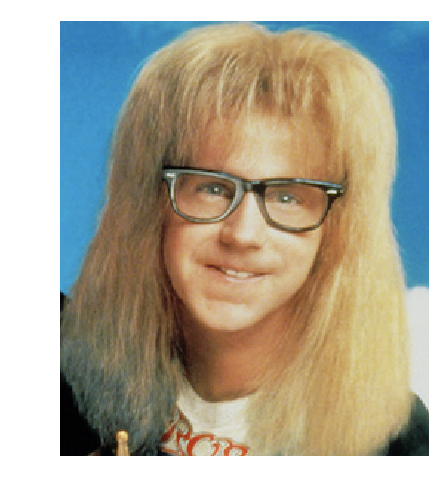

A human face detected!
94658560/94653016 [==============================] - 1s 0us/step
May share resemblance with: English_toy_spaniel
----------------------------------------------



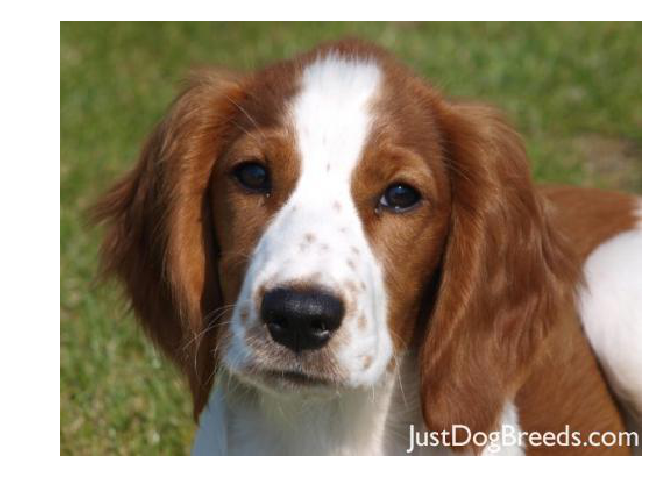

A dog detected!
Possible breed: Welsh_springer_spaniel
----------------------------------------------



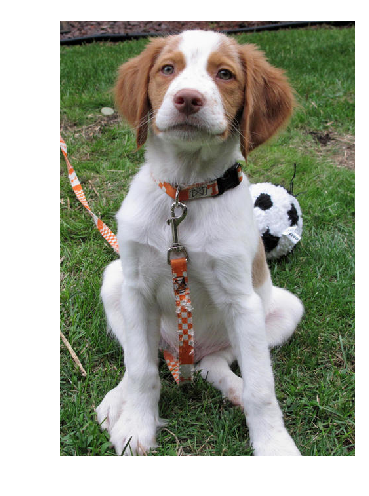

A dog detected!
Possible breed: Brittany
----------------------------------------------



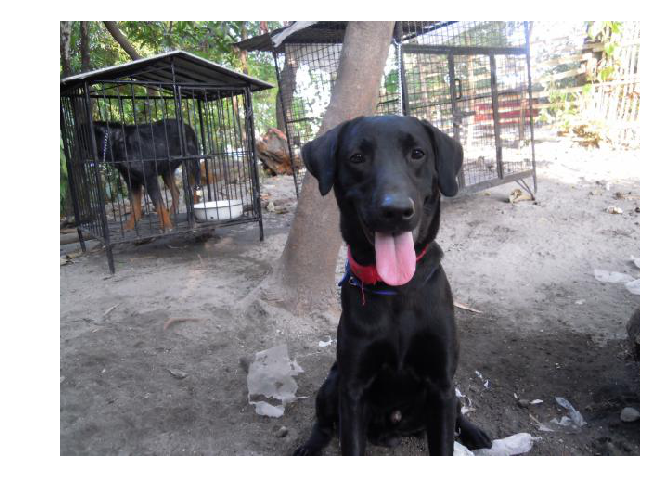

A dog detected!
Possible breed: Labrador_retriever
----------------------------------------------



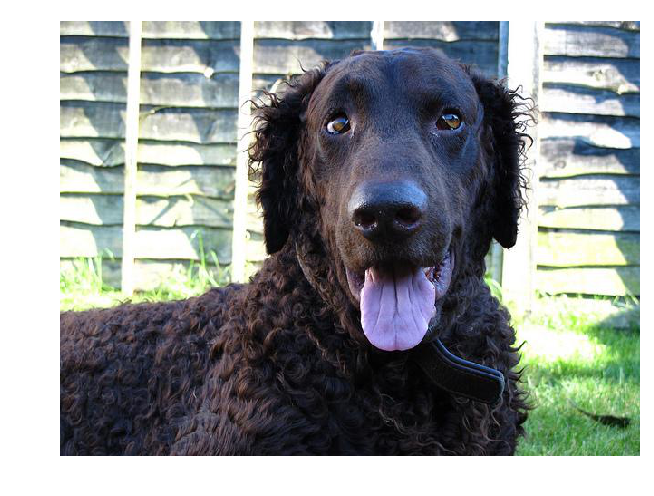

A dog detected!
Possible breed: Curly-coated_retriever
----------------------------------------------



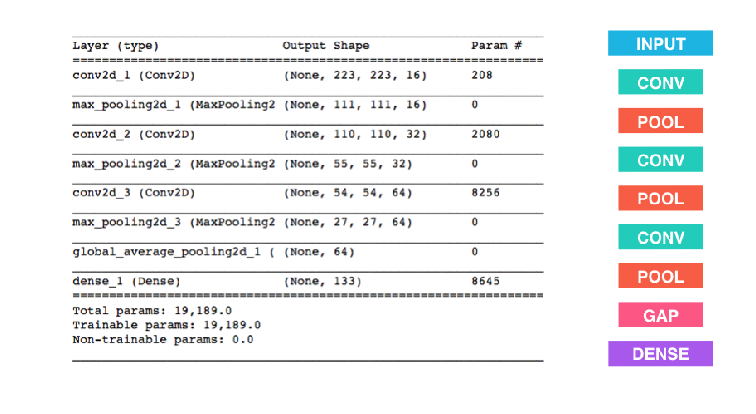

Neither a dog nor a human face was detected.
----------------------------------------------



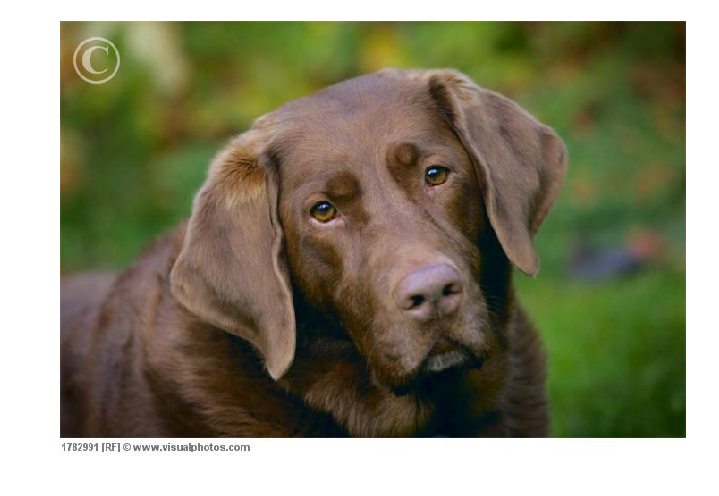

A dog detected!
Possible breed: Labrador_retriever
----------------------------------------------



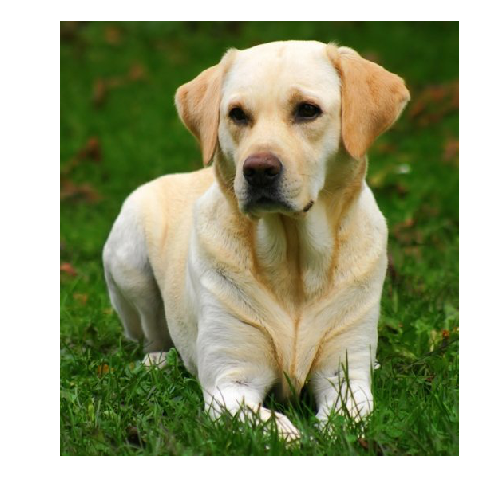

A dog detected!
Possible breed: Labrador_retriever
----------------------------------------------



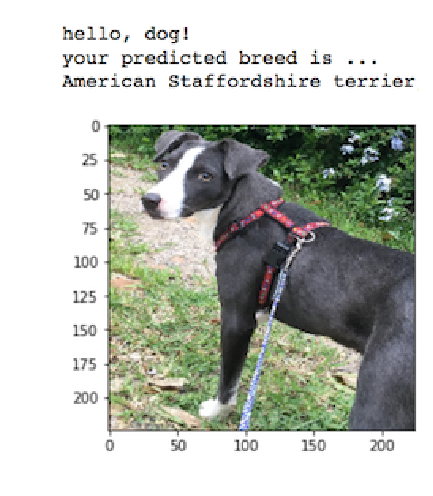

Neither a dog nor a human face was detected.
----------------------------------------------



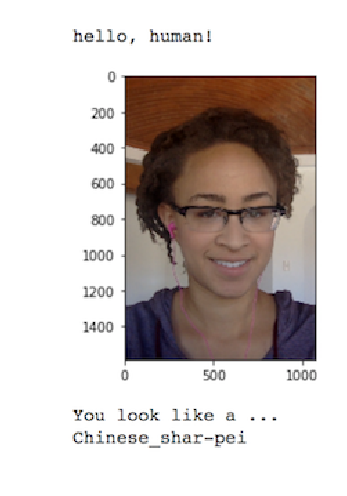

A human face detected!
May share resemblance with: English_toy_spaniel
----------------------------------------------



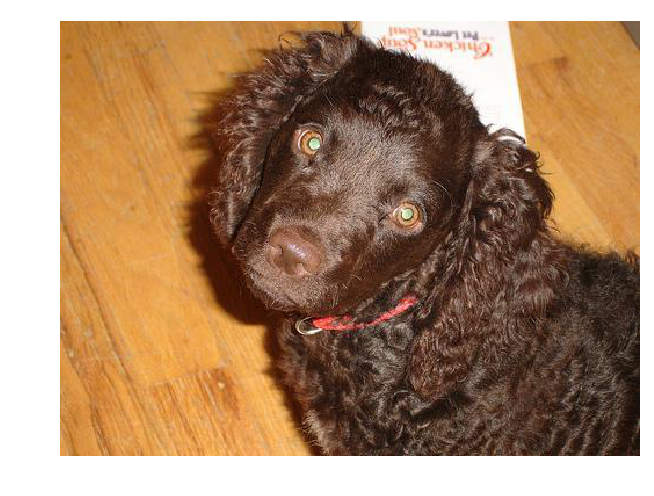

A dog detected!
Possible breed: Boykin_spaniel
----------------------------------------------



In [50]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
import os
import glob
import cv2
cwd = os.getcwd()
img_folder = cwd + "/images/*"
pics = glob.glob(img_folder)
for path in pics:
    picture_sort(path)

### Conclusion  
> In this project we tried to solve an image classification problem.  
> Given an image, if it contains a dog then answer what breed it might be.  
> Otherwise, if it contains a face then answer what dog breed shares resemblance.  
> To tackle this problem, we pursued a supervised learing approach.  
> To do that, we jumped off the shoulders of giants: beloved data curators at Udacity.  
> The dataset utilized contained over 8000 dog images and 13000 human images.  
> In taking a close look at dog data, we discovered the image count per breed  
> varies by a factor of three, the file size varies by a factor of 5, and the  
> aspect ratio of the pictures varies from wide landscapes to tall portraits.    
> Using a divide and conquer approach, first a human face detector was built.  
> This function input an image and returned a true false reply if a face was found.  
> At the heart of the human face detector works the OpenCV face cascade module.  
> Furthermore, we built a dog detector using ResNet-50 with imagenet weights.  
> Both the dog detector and face detector were found to be highly accurate, ~100%.  
> From there, focus was applied to three classifiers for distinguishing 133 breeds.  
> A simple Convolutional Neural Network, a Transfer learned VGG16, and a transfer  
> learned ResNet50.  These resulted in accuracies of 11%, 54%, and 81% repectively.  
> Finally the face and dog detector were combined with the breed classifier  
> in a way that addressed the crux of the problem, given an image - provide answers.  
>
> The successful results revealed by the output demonstrates a classification  
> approach that likely has advantage over others for compatible classification schemes.  
> Here a transfer learning approach attained a good result in a relatively short time.  
> I found it interesting that GPU training appears to progress faster than CPU alone.  
> The indication of progress seems to affirm problems are solved sooner than later.  
> I also found it interesting that this is one of the most popular projects.  
> I attribute much of the success and popularity to the dataset, thanks for that.  
> There seem many blogs featuring this topic, as if man's best friend came to the rescue.
>
> One improvement idea for this project is based upon the idea garbage in causes  
> garbage out.  That is, the images are screened for some degrees of quality that  
> are not meant to trick the network.  Making a network that classifies well using  
> clean data is a step toward making a network that works with dirty data.  
> Potentially an image fidelity classifier is put on the front end to weed out  
> images that recklessly degrade performance.  Another improvement idea relates  
> to standardizing image input formats, where variation in image sizes are regularized  
> before undergoing similar scaling routines into tensors.  In this case the image  
> shapes were found widely varying and the scaling to tensor somewhat mysterious,  
> where imposing data regularization in the interest of reducing variance may improve  
> classification noise levels.  Lastly, full stack implementation of this onto a  
> mobile phone app, seems beyond the grasp of this notebook - but what if it wasn't?  
> It would improve the project to deploy on a mobile phone in a way that puts the  
> solution of this problem into the hands of dog lovers the world over.

### Additonal inference routines

In [51]:
import pickle
# pickle dog names
pickle.dump(dog_names, open("dognames.pkl","wb"))

In [52]:
### TODO: Define your architecture.
RS50_infer = Sequential()
RS50_infer.add(GlobalAveragePooling2D(input_shape=(1,1,2048)))
RS50_infer.add(Dense(133, activation='softmax'))
RS50_infer.load_weights('saved_models/weights.best.Resnet50.hdf5')

In [53]:
def RS50_infer_predict(img_path):
    '''
    input image path
    convert image to tensor
    retrieve output of pre-trained network, aka bottleneck
    make prediction from full connected network
    return prediction of dog breed
    '''
    # extract bottleneck features
    bottleneck_feature = extract_Resnet50(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = RS50_infer.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [54]:
def infer_sort(path):
    '''
    import image path
    display image
    sort image by dog or human
    if dog, figure out the breed
    print sort decision
    '''
    # display
    pic_display(path)
    # sort class and reveal
    dog = dog_detector(path)
    human = face_detector2(path)
    if dog:
        print('A dog detected!')
        prob_breed = RS50_infer_predict(path)
        per_loc = prob_breed.find('.')+1
        print('Possible breed: '+ prob_breed[per_loc:])
    elif human:
        print('A human face detected!')
        prob_breed = RS50_infer_predict(path)
        per_loc = prob_breed.find('.')+1
        print('May share resemblance with: '+ prob_breed[per_loc:])
    else:
        print('Error: Neither dog nor human face detected.')
        
    print('----------------------------------------------')
    print()

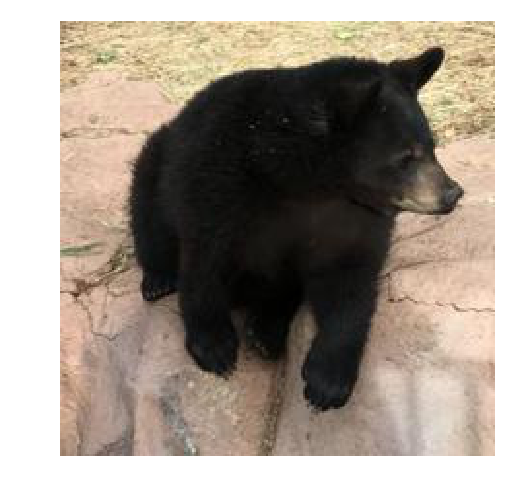

Error: Neither dog nor human face detected.
----------------------------------------------



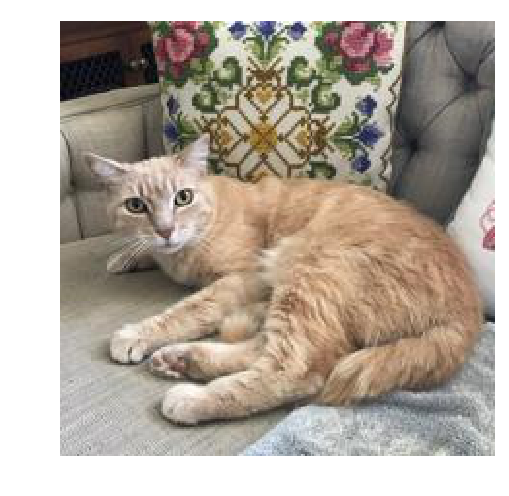

Error: Neither dog nor human face detected.
----------------------------------------------



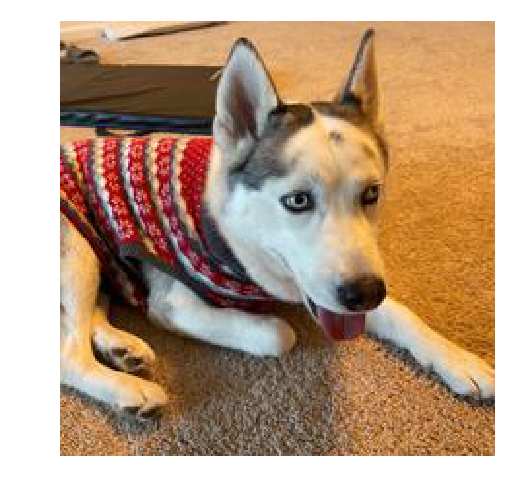

A dog detected!
Possible breed: Canaan_dog
----------------------------------------------



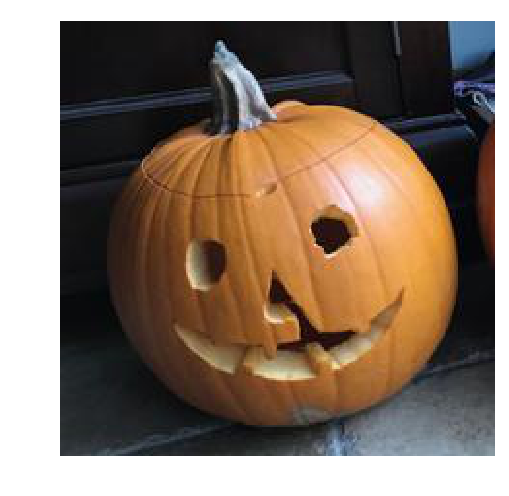

Error: Neither dog nor human face detected.
----------------------------------------------



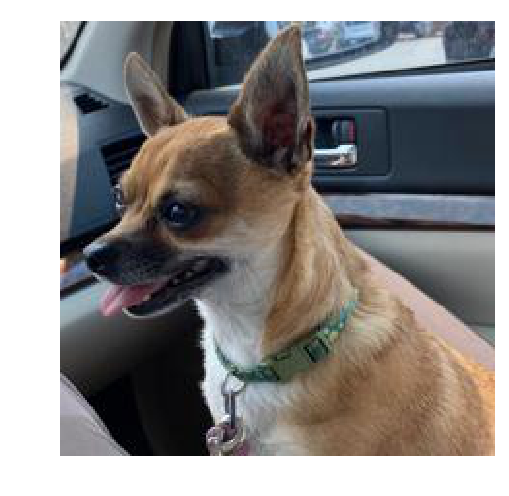

A dog detected!
Possible breed: Chihuahua
----------------------------------------------



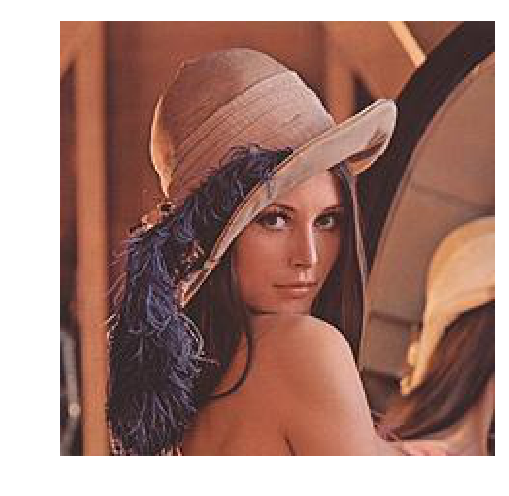

A human face detected!
May share resemblance with: Chinese_crested
----------------------------------------------



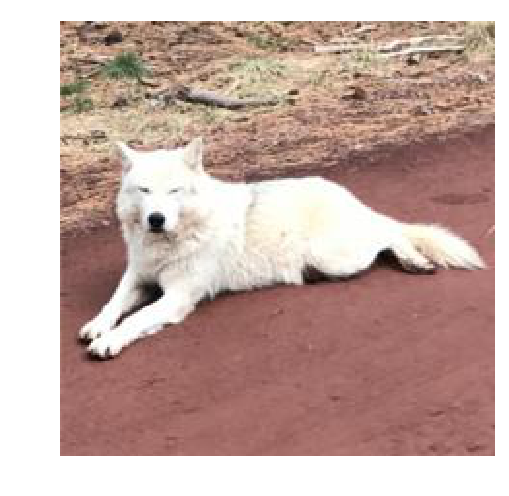

Error: Neither dog nor human face detected.
----------------------------------------------



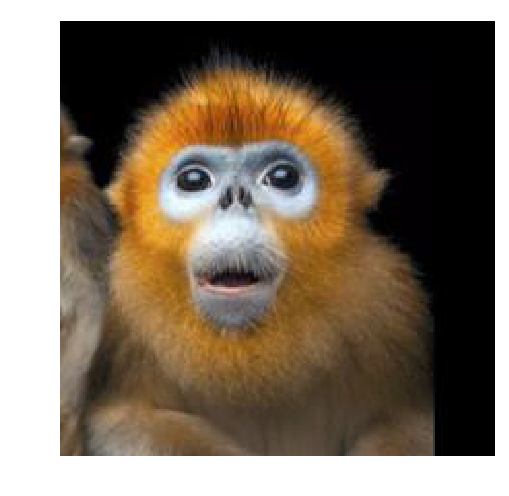

Error: Neither dog nor human face detected.
----------------------------------------------



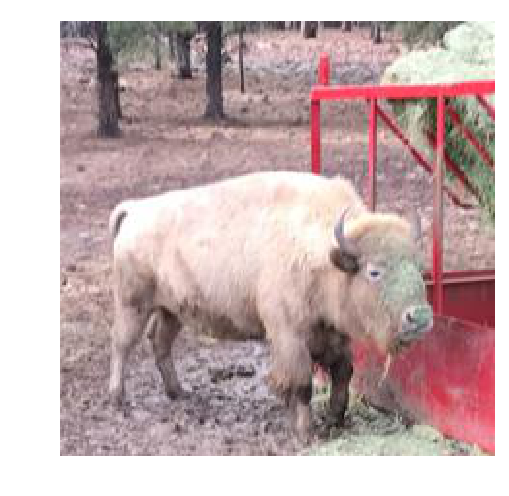

Error: Neither dog nor human face detected.
----------------------------------------------



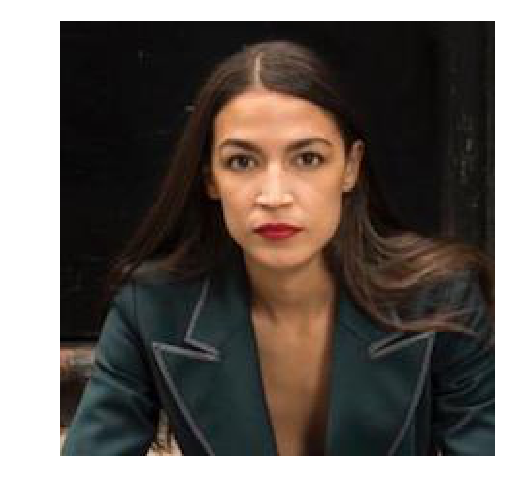

A human face detected!
May share resemblance with: Dachshund
----------------------------------------------



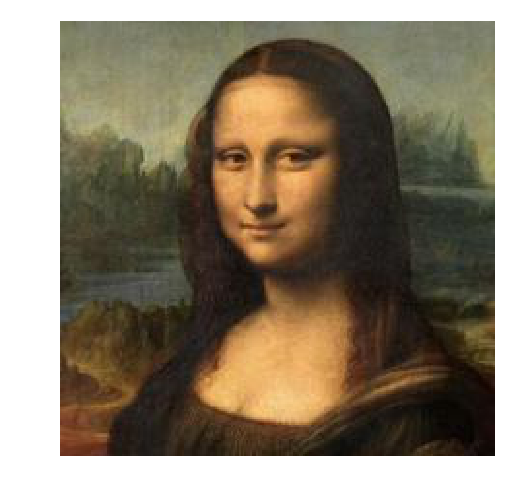

A human face detected!
May share resemblance with: English_toy_spaniel
----------------------------------------------



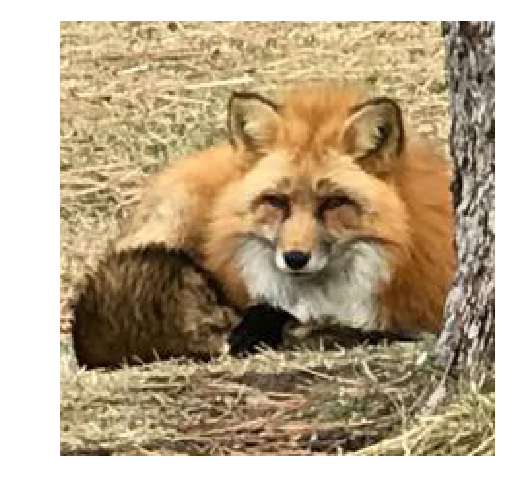

Error: Neither dog nor human face detected.
----------------------------------------------



In [55]:
# images uploaded from phone
cwd = os.getcwd()
img_folder = cwd + "/phone/*"
pics = glob.glob(img_folder)
for path in pics:
    infer_sort(path)